In [1]:
import os
import pickle
from datetime import datetime
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Import your custom libraries
import EnsRFTheory  # Ensure EnsRFTheory.py is in the same directory or Python path
import EnsembleRFs
import auxFuncs
import DatasetMaker
import LearningCurveExperiments

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [2]:
import importlib
importlib.reload(EnsRFTheory)
importlib.reload(EnsembleRFs)
importlib.reload(auxFuncs)
importlib.reload(DatasetMaker)
importlib.reload(LearningCurveExperiments)

<module 'LearningCurveExperiments' from '/n/home07/bruben/Simulations/Ensemble_DeepLearning/RandomFeatures/LearningCurveExperiments.py'>

In [3]:
#Define pathways for data and figures
save_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features'
fig_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/Figures'

# Figure 1: Sample and Feature Monotonicity

## Plots for CIFAR sweep P experiment

In [4]:
importlib.reload(LearningCurveExperiments)

<module 'LearningCurveExperiments' from '/n/home07/bruben/Simulations/Ensemble_DeepLearning/RandomFeatures/LearningCurveExperiments.py'>

In [151]:
N=256
filename_cifar = f'RF_CIFAR_N{N}_VSP.pkl'
# Load CIFAR RF experiment results
with open(os.path.join(save_path, filename_cifar), 'rb') as f:
    experiment_cifar = pickle.load(f)

In [152]:
# Unpack CIFAR RF parameters
num_trials_cifar = experiment_cifar['num_trials']
KVals_cifar = experiment_cifar['KVals']
N_cifar = experiment_cifar['N']
lamVals_cifar = experiment_cifar['lamVals']
P_list_cifar = experiment_cifar['P_list']
P_list_theory_cifar = experiment_cifar['P_list_theory']
PTest_cifar = experiment_cifar['PTest']
nonlinearity_cifar = experiment_cifar['nonlinearity']
class_groups_cifar = experiment_cifar['class_groups']
test_errors_cifar = experiment_cifar['test_errors']  # Numerical results
test_errors_theory_cifar = experiment_cifar['test_errors_theory']  #

In [153]:
mean_test_errors_cifar = np.mean(test_errors_cifar, axis=0)
std_test_errors_cifar = np.std(test_errors_cifar, axis=0)

In [154]:
importlib.reload(LearningCurveExperiments)

<module 'LearningCurveExperiments' from '/n/home07/bruben/Simulations/Ensemble_DeepLearning/RandomFeatures/LearningCurveExperiments.py'>

In [155]:
mean_test_errors_cifar.shape

(4, 20, 50, 4)

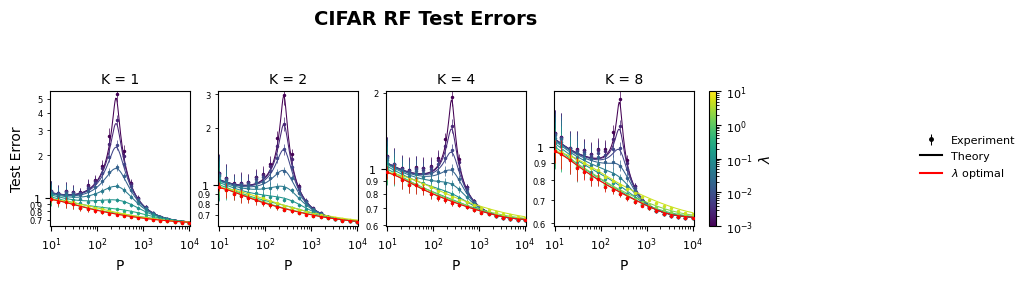

In [156]:
# Plot for CIFAR RF Experiment using mean ensembling
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_P(
    KVals_cifar, 
    P_list_cifar, 
    P_list_theory_cifar, 
    lamVals_cifar, 
    mean_test_errors_cifar[:,:,:,0], 
    std_test_errors_cifar[:,:,:,0], 
    test_errors_theory_cifar, 
    title_prefix="CIFAR RF Test Errors", 
    nth_lam = 5,
    save_path = os.path.join(fig_path, f'CIFAR_N{N_cifar}_EVsP'),
    sharey=False
)

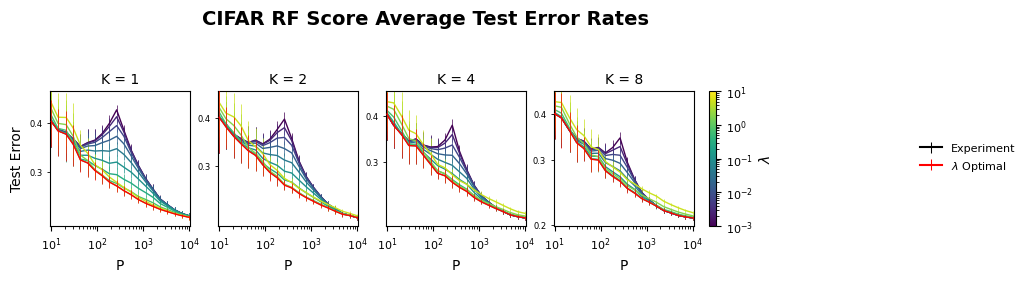

In [157]:
# Plot for CIFAR RF Experiment using majority vote ensembling
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_P(
    KVals_cifar, 
    P_list_cifar, 
    P_list_theory_cifar, 
    lamVals_cifar, 
    mean_test_errors_cifar[:,:,:,1], 
    std_test_errors_cifar[:,:,:,1], 
    title_prefix="CIFAR RF Score Average Test Error Rates", 
    nth_lam = 5,
    save_path = os.path.join(fig_path, f'CIFAR_N{N_cifar}_EVsP_ScoreAverage_ErrorRate'),
    sharey=False
)

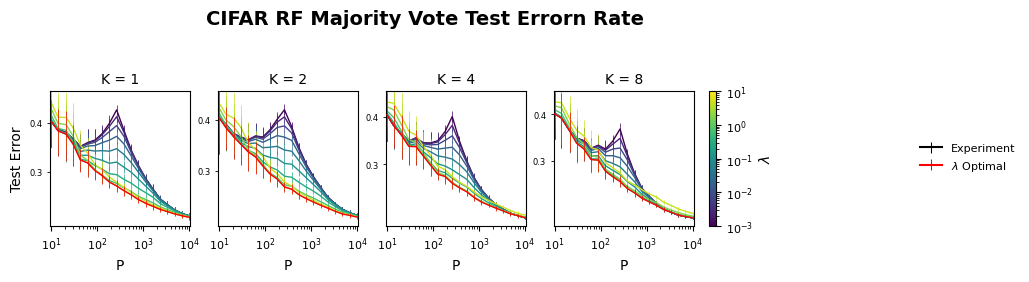

In [158]:
# Plot for CIFAR RF Experiment using majority vote ensembling
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_P(
    KVals_cifar, 
    P_list_cifar, 
    P_list_theory_cifar, 
    lamVals_cifar, 
    mean_test_errors_cifar[:,:,:,2], 
    std_test_errors_cifar[:,:,:,2], 
    title_prefix="CIFAR RF Majority Vote Test Errorn Rate", 
    nth_lam = 5,
    save_path = os.path.join(fig_path, f'CIFAR_N{N_cifar}_EVsP_MajVote_ErrorRate'),
    sharey=False
)

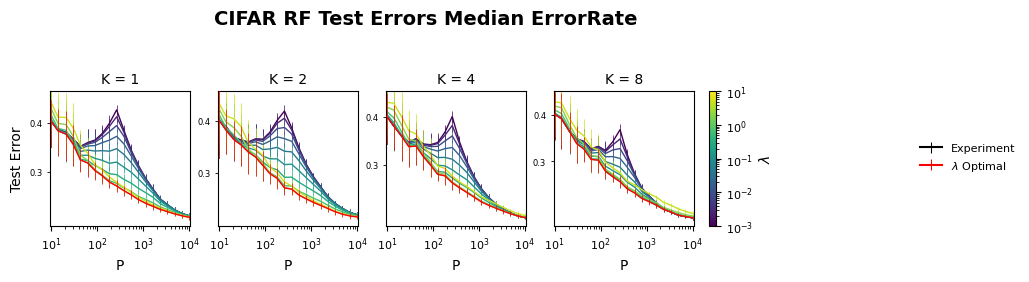

In [159]:
# Plot for CIFAR RF Experiment using majority vote ensembling
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_P(
    KVals_cifar, 
    P_list_cifar, 
    P_list_theory_cifar, 
    lamVals_cifar, 
    mean_test_errors_cifar[:,:,:,3], 
    std_test_errors_cifar[:,:,:,3], 
    title_prefix="CIFAR RF Test Errors Median ErrorRate", 
    nth_lam = 5,
    save_path = os.path.join(fig_path, f'CIFAR_N{N_cifar}_EVsP_Median_ErrorRate'),
    sharey=False
)

In [162]:
importlib.reload(LearningCurveExperiments)

<module 'LearningCurveExperiments' from '/n/home07/bruben/Simulations/Ensemble_DeepLearning/RandomFeatures/LearningCurveExperiments.py'>

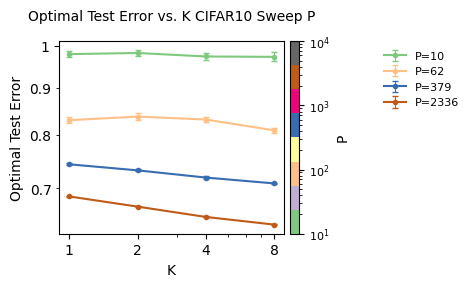

In [163]:
LearningCurveExperiments.plot_optimal_errors_vs_K_Pcolor(
    KVals_cifar, 
    P_list_cifar, 
    mean_test_errors_cifar[:, :, :, 0], 
    std_test_errors_cifar[:, :, :, 0]/np.sqrt(num_trials_cifar),
    title="Optimal Test Error vs. K CIFAR10 Sweep P", 
    save_path  = os.path.join(fig_path, f'CIFAR_N{N_cifar}_EVsK'),
    nth_P=5
)

## Plot CIFAR10 Error Vs. N Expeirments

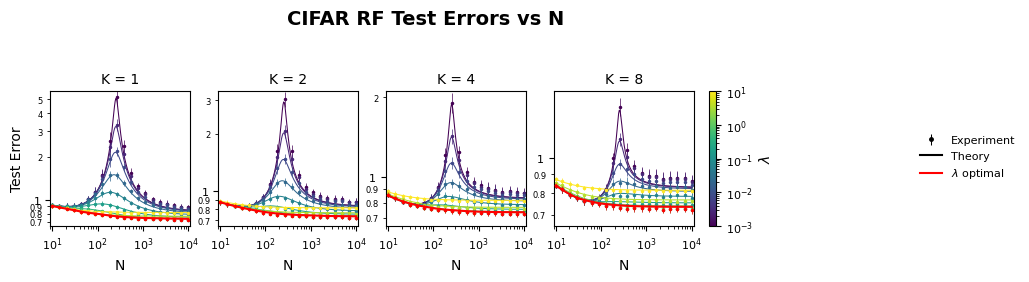

In [143]:
P=256
filename_cifar = f'RF_CIFAR_P{P}_VsN.pkl'  # Updated filename for the N sweep results
# Load CIFAR RF experiment results
with open(os.path.join(save_path, filename_cifar), 'rb') as f:
    experiment_cifar = pickle.load(f)

# Unpack CIFAR RF parameters
num_trials_cifar = experiment_cifar['num_trials']
NVals_cifar = experiment_cifar['NVals']  # Sweep over N
NVals_theory_cifar = experiment_cifar['NVals_theory']
KVals_cifar = experiment_cifar['KVals']
lamVals_cifar = experiment_cifar['lamVals']
P_cifar = experiment_cifar['P']  # Fixed P
PTest_cifar = experiment_cifar['PTest']
nonlinearity_cifar = experiment_cifar['nonlinearity']
class_groups_cifar = experiment_cifar['class_groups']
test_errors_cifar = experiment_cifar['test_errors']  # Numerical results
test_errors_theory_cifar = experiment_cifar['test_errors_theory']  # Theoretical results
#ensErrFuncs = experiment_cifar['ensErrFuncs']

# Compute mean and standard deviation of test errors over trials
mean_test_errors_cifar = np.mean(test_errors_cifar, axis=0)
std_test_errors_cifar = np.std(test_errors_cifar, axis=0)

importlib.reload(LearningCurveExperiments)

# Plot for CIFAR RF Experiment (sweep over N)
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_N(
    NVals_cifar, NVals_theory_cifar, KVals_cifar, lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 0], std_test_errors_cifar[:, :, :, 0], 
    test_errors_theory_cifar, 
    title_prefix="CIFAR RF Test Errors vs N", 
    save_path=os.path.join(fig_path, f'CIFAR_P{P_cifar}_VsN'),
    sharey=False
)

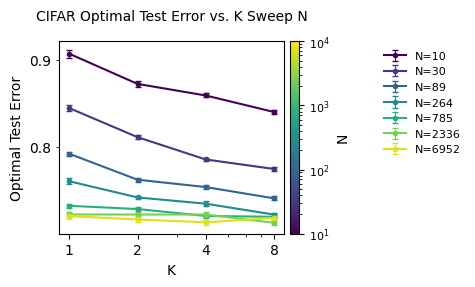

In [145]:
LearningCurveExperiments.plot_optimal_errors_vs_K_Ncolor(
    KVals_cifar, 
    NVals_cifar, 
    mean_test_errors_cifar[:, :, :, 0], 
    std_test_errors_cifar[:, :, :, 0]/np.sqrt(num_trials_cifar), 
    title="CIFAR Optimal Test Error vs. K Sweep N",
    save_path=os.path.join(fig_path, f'CIFAR_P{P_cifar}_EVsK'),
    nth_N=3)

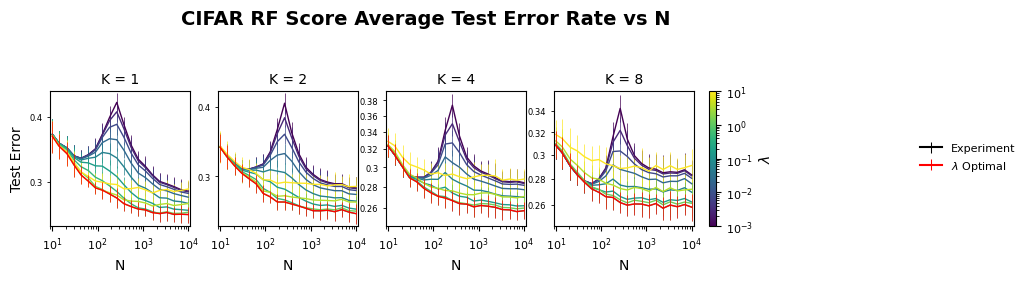

In [146]:
# Plot for CIFAR RF Experiment (sweep over N)
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_N(
    NVals_cifar, NVals_theory_cifar, KVals_cifar, lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 1], std_test_errors_cifar[:, :, :, 1], 
    title_prefix="CIFAR RF Score Average Test Error Rate vs N", 
    save_path=os.path.join(fig_path, f'CIFAR_P{P_cifar}_ERate_ScoreAverage_VsN'),
    sharey=False
)

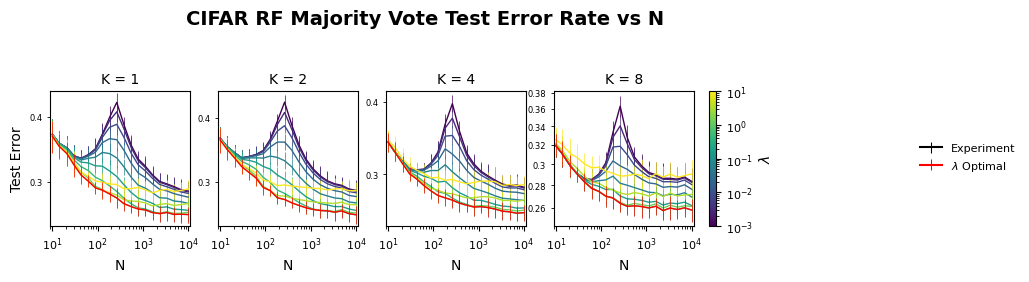

In [147]:
# Plot for CIFAR RF Experiment (sweep over N)
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_N(
    NVals_cifar, NVals_theory_cifar, KVals_cifar, lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 2], std_test_errors_cifar[:, :, :, 2], 
    title_prefix="CIFAR RF Majority Vote Test Error Rate vs N", 
    save_path=os.path.join(fig_path, f'CIFAR_P{P_cifar}_ERate_MV_VsN'),
    sharey=False
)

# Figure 2: $E_g$ increases monotonically with $K$ when $\lambda$ is optimally tuned

In [21]:
# Gaussian RF Experiment
alpha = 1.2
r = .4
M = 1000
filename_gaussian = rf'RF_Gaussian_alpha{alpha}_r{r}_M_{M}.pkl'

# Load Gaussian RF experiment results
with open(os.path.join(save_path, filename_gaussian), 'rb') as f:
    experiment_gaussian = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/RF_Gaussian_alpha1.2_r0.4_M_1000.pkl'

In [357]:
# Unpack Gaussian RF parameters
num_trials_gaussian = experiment_gaussian['num_trials']
KVals_gaussian = experiment_gaussian['KVals']
M_gaussian = experiment_gaussian['M']
alpha_gaussian = experiment_gaussian['alpha']
r_gaussian = experiment_gaussian['r']
lamVals_gaussian = experiment_gaussian['lamVals']
P_list_gaussian = experiment_gaussian['P_list']
PTest_gaussian = experiment_gaussian['PTest']
nonlinearity_gaussian = experiment_gaussian['nonlinearity']
test_errors_gaussian = experiment_gaussian['test_errors']  # Numerical results
test_errors_theory_gaussian = experiment_gaussian['test_errors_theory']  # Theoretical results

NameError: name 'experiment_gaussian' is not defined

In [358]:
# Compute mean and standard deviation over trials for Gaussian experiment
mean_test_errors_gaussian = np.mean(test_errors_gaussian, axis=0)
std_test_errors_gaussian = np.std(test_errors_gaussian, axis=0)

NameError: name 'test_errors_gaussian' is not defined

In [359]:
# Plot for Gaussian RF Experiment
LearningCurveExperiments.plot_test_errors_with_shaded_regions(KVals_gaussian, P_list_gaussian, lamVals_gaussian, mean_test_errors_gaussian, std_test_errors_gaussian, test_errors_theory_gaussian, title_prefix=rf"Gaussian ($\alpha$={alpha_gaussian}, $r$={r_gaussian}) RF Test Errors ", save_path = os.path.join(fig_path, f'Gauss_alpha{alpha_gaussian}_r{r_gaussian}_M{M_gaussian}_EVsLam'))
optimal_errors_numerical_gaussian, std_errors_numerical_gaussian, optimal_errors_theory_gaussian = LearningCurveExperiments.compute_optimal_errors(mean_test_errors_gaussian, std_test_errors_gaussian, test_errors_theory_gaussian, KVals_gaussian, P_list_gaussian)
LearningCurveExperiments.plot_optimal_errors_vs_K(KVals_gaussian, P_list_gaussian, num_trials_gaussian, optimal_errors_numerical_gaussian, std_errors_numerical_gaussian, optimal_errors_theory_gaussian, title=rf"Optimal Gaussian ($\alpha$={alpha_gaussian}, $r$={r_gaussian}) Test Error vs. K", save_path = os.path.join(fig_path, f'Gauss_alpha{alpha_gaussian}_r{r_gaussian}_M{M_gaussian}_OptErrVsK'))

NameError: name 'KVals_gaussian' is not defined

## Plots for CIFAR Ensemble Experiment

In [5]:
filename_cifar = 'RF_CIFAR.pkl'
# Load CIFAR RF experiment results
with open(os.path.join(save_path, filename_cifar), 'rb') as f:
    experiment_cifar = pickle.load(f)

In [6]:
# Unpack CIFAR RF parameters
num_trials_cifar = experiment_cifar['num_trials']
KVals_cifar = experiment_cifar['KVals']
M_cifar = experiment_cifar['M']
lamVals_cifar = experiment_cifar['lamVals']
P_list_cifar = experiment_cifar['P_list']
PTest_cifar = experiment_cifar['PTest']
nonlinearity_cifar = experiment_cifar['nonlinearity']
class_groups_cifar = experiment_cifar['class_groups']
test_errors_cifar = experiment_cifar['test_errors']  # Numerical results
test_errors_theory_cifar = experiment_cifar['test_errors_theory']  #
bias_theory_cifar = experiment_cifar['bias_theory']
var_theory_cifar = experiment_cifar['var_theory']
M_cifar = experiment_cifar['M']

In [7]:
mean_test_errors_cifar = np.mean(test_errors_cifar, axis=0)
std_test_errors_cifar = np.std(test_errors_cifar, axis=0)

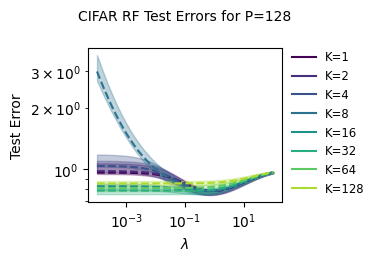

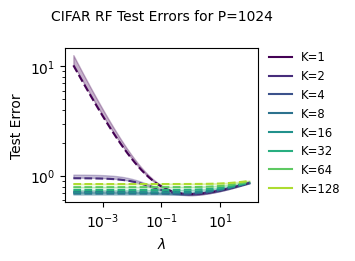

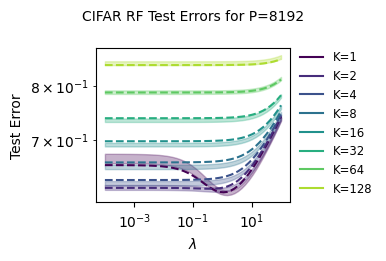

In [8]:
# Plot for CIFAR RF Experiment
LearningCurveExperiments.plot_test_errors_with_shaded_regions(
    KVals_cifar, 
    P_list_cifar, 
    lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 0], 
    std_test_errors_cifar[:, :, :, 0], 
    test_errors_theory_cifar, 
    title_prefix="CIFAR RF Test Errors", 
    save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_EVsLam'))

In [18]:
importlib.reload(LearningCurveExperiments)

<module 'LearningCurveExperiments' from '/n/home07/bruben/Simulations/Ensemble_DeepLearning/RandomFeatures/LearningCurveExperiments.py'>

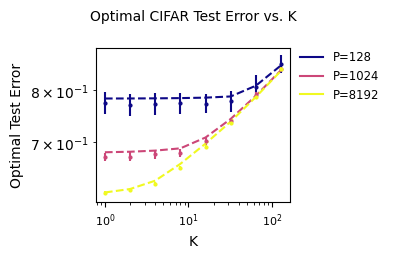

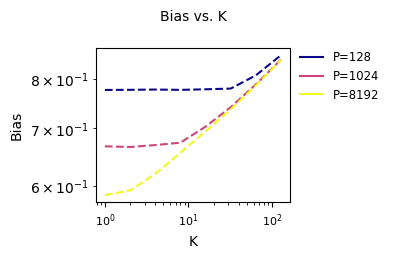

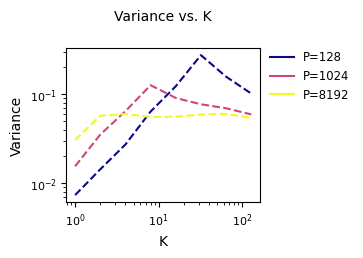

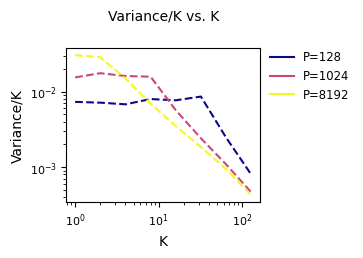

In [19]:
importlib.reload(LearningCurveExperiments)

optimal_errors_numerical_cifar, std_errors_numerical_cifar, optimal_errors_theory_cifar, optimal_bias_theory_cifar, optimal_var_theory_cifar = LearningCurveExperiments.compute_optimal_errors_bias_variance(
    mean_test_errors_cifar[:, :, :, 0], std_test_errors_cifar[:, :, :, 0], test_errors_theory_cifar, bias_theory_cifar, var_theory_cifar, KVals_cifar, P_list_cifar
)

optimal_varoverK_theory_cifar = optimal_var_theory_cifar/(np.tile(np.array(KVals_cifar), (len(P_list_cifar),1)).T)

# Plot optimal errors for CIFAR RF Experiment
LearningCurveExperiments.plot_optimal_errors_vs_K(KVals_cifar, P_list_cifar, num_trials_cifar, optimal_errors_numerical_cifar, std_errors_numerical_cifar, optimal_errors_theory_cifar, title="Optimal CIFAR Test Error vs. K", save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_OptEVsK'))
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, optimal_bias_theory_cifar, title="Bias vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_OptBiasVsK'), ylabel = 'Bias')
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, optimal_var_theory_cifar, title="Variance vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_OptVarVsK'), ylabel = 'Variance')
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, optimal_varoverK_theory_cifar, title="Variance/K vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_OptVarOverKVsK'), ylabel = 'Variance/K')

No overlapping bias range across K values for PInd=2


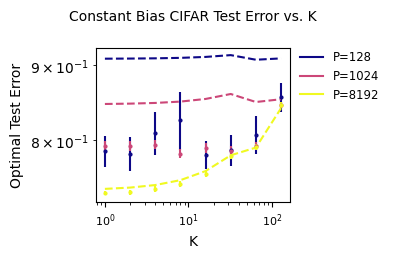

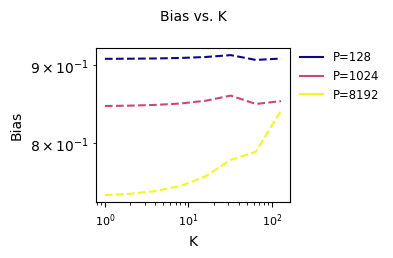

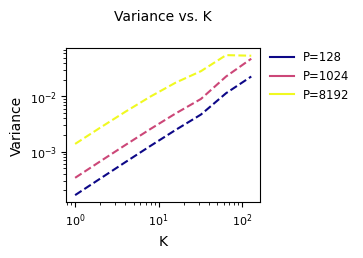

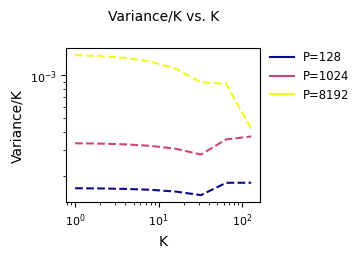

In [20]:
constbias_errors_numerical_cifar, std_errors_numerical_cifar, constbias_errors_theory_cifar, constbias_bias_theory_cifar, constbias_var_theory_cifar = LearningCurveExperiments.compute_constant_bias_errors(
    mean_test_errors_cifar[:, :, :, 0], std_test_errors_cifar[:, :, :, 0], test_errors_theory_cifar, bias_theory_cifar, var_theory_cifar, KVals_cifar, P_list_cifar
)

constbias_varoverK_theory_cifar = constbias_var_theory_cifar/(np.tile(np.array(KVals_cifar), (len(P_list_cifar),1)).T)

# Plot Constant Bias errors for CIFAR RF Experiment
LearningCurveExperiments.plot_optimal_errors_vs_K(KVals_cifar, P_list_cifar, num_trials_cifar, constbias_errors_numerical_cifar, std_errors_numerical_cifar, constbias_errors_theory_cifar, title="Constant Bias CIFAR Test Error vs. K", save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_ConstBiasEVsK'))
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, constbias_bias_theory_cifar, title="Bias vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_ConstBiasBiasVsK'), ylabel = 'Bias')
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, constbias_var_theory_cifar, title="Variance vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_constbiasVarVsK'), ylabel = 'Variance')
LearningCurveExperiments.plot_quantity_vs_K(KVals_cifar, P_list_cifar, constbias_varoverK_theory_cifar, title="Variance/K vs. K",  save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}_constbiasVarOverKVsK'), ylabel = 'Variance/K')

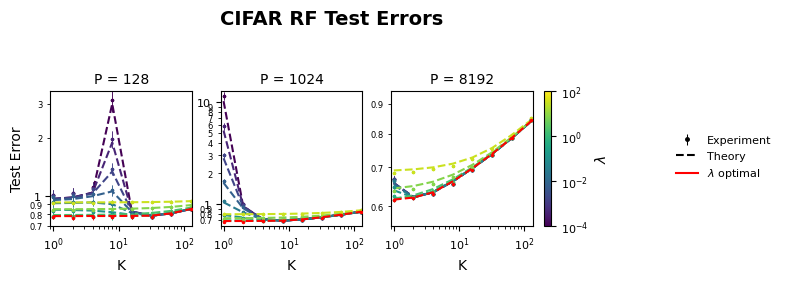

In [126]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_cifar, 
    P_list_cifar, 
    P_list_cifar,  
    lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 0], 
    std_test_errors_cifar[:, :, :, 0], 
    test_errors_theory_cifar, 
    title_prefix="CIFAR RF Test Errors", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}AllEVsK'),
    sharey=False
)

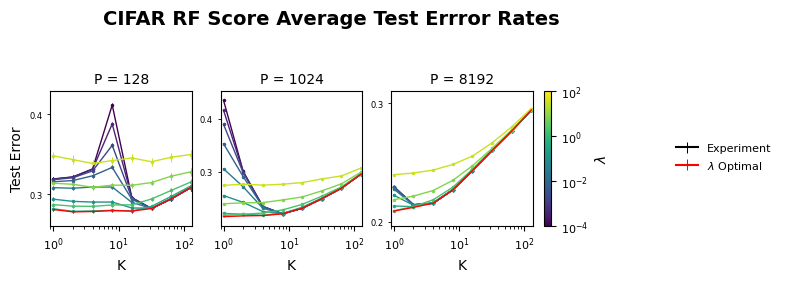

In [127]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_cifar, 
    P_list_cifar, 
    P_list_cifar,  
    lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 1], 
    std_test_errors_cifar[:, :, :, 1]/np.sqrt(num_trials_cifar),  
    title_prefix="CIFAR RF Score Average Test Errror Rates", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}AllEVsK_ScoreAverage_ErrorRate'),
    sharey=False
)

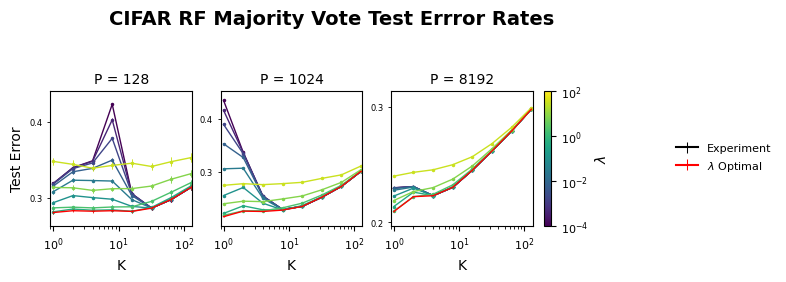

In [128]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_cifar, 
    P_list_cifar, 
    P_list_cifar,  
    lamVals_cifar, 
    mean_test_errors_cifar[:, :, :, 2], 
    std_test_errors_cifar[:, :, :, 2]/np.sqrt(num_trials_cifar),  
    title_prefix="CIFAR RF Majority Vote Test Errror Rates", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'CIFAR_M{M_cifar}AllEVsK_MajVote_ErrorRate'),
    sharey=False
)

## MNIST Ensemble Plots

In [92]:
filename_mnist = 'RF_MNIST.pkl'
# Load MNIST RF experiment results
with open(os.path.join(save_path, filename_mnist), 'rb') as f:
    experiment_mnist = pickle.load(f)

In [93]:
# Unpack MNIST RF parameters
num_trials_mnist = experiment_mnist['num_trials']
KVals_mnist = experiment_mnist['KVals']
M_mnist = experiment_mnist['M']
lamVals_mnist = experiment_mnist['lamVals']
P_list_mnist = experiment_mnist['P_list']
PTest_mnist = experiment_mnist['PTest']
nonlinearity_mnist = experiment_mnist['nonlinearity']
class_groups_mnist = experiment_mnist['class_groups']
test_errors_mnist = experiment_mnist['test_errors']  # Numerical results
test_errors_theory_mnist = experiment_mnist['test_errors_theory']  #
bias_theory_mnist = experiment_mnist['bias_theory']
var_theory_mnist = experiment_mnist['var_theory']
ensErrFuncs = experiment_mnist['ensErrFuncs']

In [94]:
mean_test_errors_mnist = np.mean(test_errors_mnist, axis=0)
std_test_errors_mnist = np.std(test_errors_mnist, axis=0)#/(num_trials_mnist)**(1/2)

In [95]:
mean_test_errors_mnist.shape

(8, 3, 50, 3)

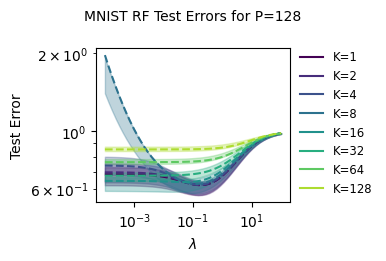

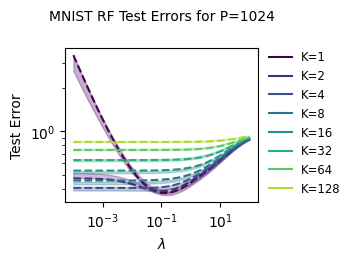

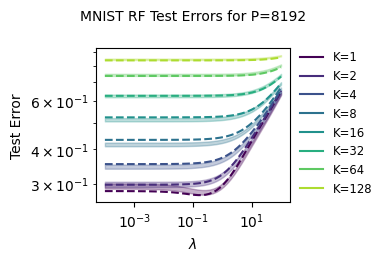

In [96]:
# Plot for MNIST RF Experiment
LearningCurveExperiments.plot_test_errors_with_shaded_regions(KVals_mnist, P_list_mnist, lamVals_mnist, mean_test_errors_mnist[:, :, :, 0], std_test_errors_mnist[:, :, :, 0], test_errors_theory_mnist, title_prefix="MNIST RF Test Errors", save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_EVsLam'))

optimal_errors_numerical_mnist, std_errors_numerical_mnist, optimal_errors_theory_mnist = LearningCurveExperiments.compute_optimal_errors(
    mean_test_errors_mnist[:, :, :, 0], std_test_errors_mnist[:, :, :, 0], test_errors_theory_mnist, KVals_mnist, P_list_mnist
)

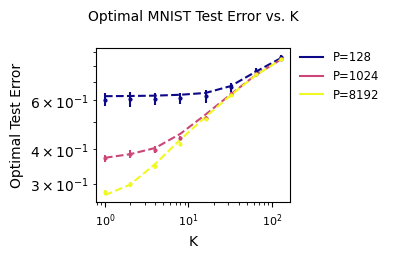

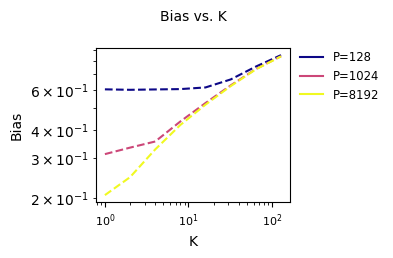

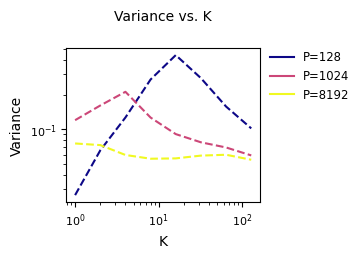

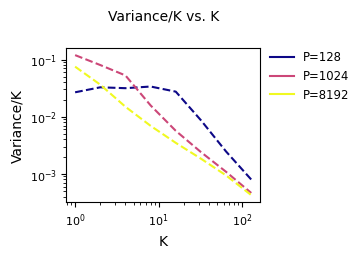

In [97]:
optimal_errors_numerical_mnist, std_errors_numerical_mnist, optimal_errors_theory_mnist, optimal_bias_theory_mnist, optimal_var_theory_mnist = LearningCurveExperiments.compute_optimal_errors_bias_variance(
    mean_test_errors_mnist[:, :, :, 0], std_test_errors_mnist[:, :, :, 0], test_errors_theory_mnist, bias_theory_mnist, var_theory_mnist, KVals_mnist, P_list_mnist
)

optimal_varoverK_theory_mnist = optimal_var_theory_mnist/(np.tile(np.array(KVals_mnist), (len(P_list_mnist),1)).T)

# Plot optimal errors for MNIST RF Experiment
LearningCurveExperiments.plot_optimal_errors_vs_K(KVals_mnist, P_list_mnist, num_trials_mnist, optimal_errors_numerical_mnist, std_errors_numerical_mnist, optimal_errors_theory_mnist, title="Optimal MNIST Test Error vs. K", save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_OptEVsK'))
LearningCurveExperiments.plot_quantity_vs_K(KVals_mnist, P_list_mnist, optimal_bias_theory_mnist, title="Bias vs. K",  save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_OptBiasVsK'), ylabel = 'Bias')
LearningCurveExperiments.plot_quantity_vs_K(KVals_mnist, P_list_mnist, optimal_var_theory_mnist, title="Variance vs. K",  save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_OptVarVsK'), ylabel = 'Variance')
LearningCurveExperiments.plot_quantity_vs_K(KVals_mnist, P_list_mnist, optimal_varoverK_theory_mnist, title="Variance/K vs. K",  save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_OptVarOverKVsK'), ylabel = 'Variance/K')

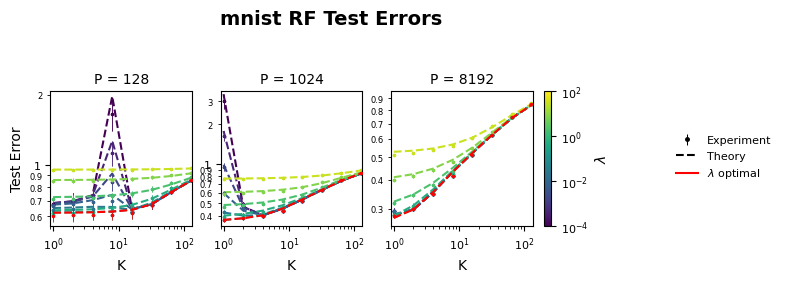

In [98]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_mnist, 
    P_list_mnist, 
    P_list_mnist,  
    lamVals_mnist, 
    mean_test_errors_mnist[:, :, :, 0], 
    std_test_errors_mnist[:, :, :, 0], 
    test_errors_theory_mnist, 
    title_prefix="mnist RF Test Errors", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_AllEVsK'),
    sharey=False
)

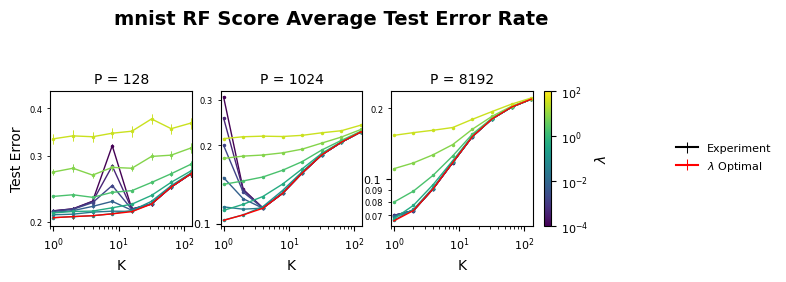

In [99]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_mnist, 
    P_list_mnist, 
    P_list_mnist,  
    lamVals_mnist, 
    mean_test_errors_mnist[:, :, :, 1], 
    std_test_errors_mnist[:, :, :, 1]/np.sqrt(num_trials_mnist), 
    title_prefix="mnist RF Score Average Test Error Rate", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_AllEVsK_ScoreAverage_ErrorRate'),
    sharey=False
)

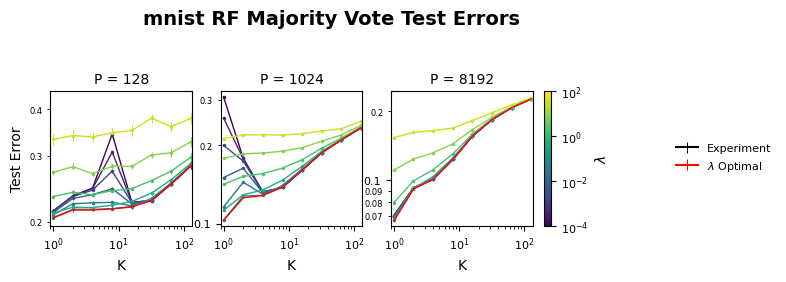

In [100]:
LearningCurveExperiments.plot_test_errors_with_errorbars_vs_K(
    KVals_mnist, 
    P_list_mnist, 
    P_list_mnist,  
    lamVals_mnist, 
    mean_test_errors_mnist[:, :, :, 2], 
    std_test_errors_mnist[:, :, :, 2]/np.sqrt(num_trials_mnist), 
    title_prefix="mnist RF Majority Vote Test Errors", 
    nth_lam=5, 
    save_path = os.path.join(fig_path, f'MNIST_M{M_mnist}_AllEVsK_MajVote_ErrorRate'),
    sharey=False
)

# Figure 3: Scaling Laws for Ensembles

## Plots for Gaussian Scaling with M

In [164]:
# r_list = [.8, 1.2]

# for r in r_list:
#     # Paths
#     save_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features'
#     fig_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/Figures'

#     # Parameters (adjust these to match your experiment)
#     alpha = 1.5
#     num_trials = 5
#     filename = f'RF_Gaussian_alpha{alpha}_r{r}_M_100-1000_P_15000_trials_{num_trials}.pkl'

#     # Load experiment results
#     with open(os.path.join(save_path, filename), 'rb') as f:
#         experiment_results = pickle.load(f)

#     # Unpack parameters
#     num_trials = experiment_results['num_trials']
#     ell_list = experiment_results['ell_list']
#     M_list = experiment_results['M_list']
#     lamVals = experiment_results['lamVals']
#     P = experiment_results['P']
#     nonlinearity = experiment_results['nonlinearity']
#     test_errors = experiment_results['test_errors']          # Numerical results
#     test_errors_theory = experiment_results['test_errors_theory']  # Theoretical results
#     alpha = experiment_results['alpha']
#     r = experiment_results['r']

#     # Ensure test_errors is available
#     if test_errors is not None:
#         num_trials = test_errors.shape[0]
#         num_MVals = len(M_list)
#         num_ellVals = len(ell_list)
#         num_lamVals = len(lamVals)

#         # Initialize array to hold optimal errors per trial
#         optimal_errors_numerical_trials = np.zeros((num_trials, num_MVals, num_ellVals))

#         # Compute optimal errors for each trial
#         for trial in range(num_trials):
#             # Find the minimum test error over lambda values for each (M, ell)
#             optimal_errors_numerical_trials[trial, :, :] = np.min(test_errors[trial, :, :, :], axis=2)

#         # Compute mean and standard deviation of optimal errors over trials
#         mean_optimal_errors_numerical = np.mean(optimal_errors_numerical_trials, axis=0)
#         std_optimal_errors_numerical = np.std(optimal_errors_numerical_trials, axis=0)
#     else:
#         mean_optimal_errors_numerical = None
#         std_optimal_errors_numerical = None

#     # Compute theoretical optimal errors (minimum over lambda values)
#     optimal_errors_theory = np.min(test_errors_theory, axis=2)

#     # Plot optimal test errors vs M
#     title = f"Optimal Test Error vs. M (alpha={alpha}, r={r})"
#     save_path_fig = os.path.join(fig_path, f'OptimalErrors_vs_M_alpha{alpha}_r{r}.svg')
#     LearningCurveExperiments.plot_optimal_errors_vs_M(
#         M_list,
#         ell_list,
#         mean_optimal_errors_numerical,
#         std_optimal_errors_numerical,
#         optimal_errors_theory,
#         num_trials,
#         title=title,
#         save_path=save_path_fig
#     )

#     # Compute scaling exponents for each trial
#     scaling_exponents_trials = np.zeros((num_trials, len(ell_list)))

#     for trial in range(num_trials):
#         scaling_exponents_trials[trial, :] = LearningCurveExperiments.fit_power_law_to_errors(
#             M_list,
#             optimal_errors_numerical_trials[trial, :, :],
#             ell_list
#         )

#     # Compute mean and standard deviation of scaling exponents over trials
#     mean_scaling_exponents = np.mean(scaling_exponents_trials, axis=0)
#     std_scaling_exponents = np.std(scaling_exponents_trials, axis=0)

#     # Plot scaling exponent vs ell with error bars
#     title = f"Scaling Exponent vs. $\ell$ (alpha={alpha}, r={r})"
#     save_path_fig = os.path.join(fig_path, f'ScalingExponent_vs_ell_alpha{alpha}_r{r}.svg')
#     LearningCurveExperiments.plot_scaling_exponent_vs_ell_with_theory(
#         ell_list,
#         mean_scaling_exponents,
#         alpha,
#         r,
#         title=title,
#         save_path=save_path_fig,
#         std_scaling_exponents=std_scaling_exponents  # Pass standard deviation for error bars
#     )


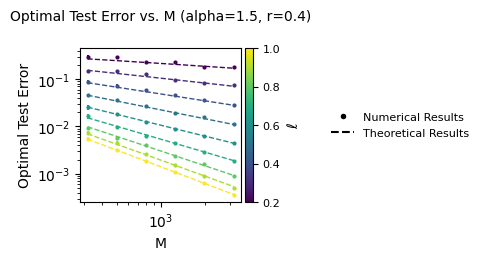

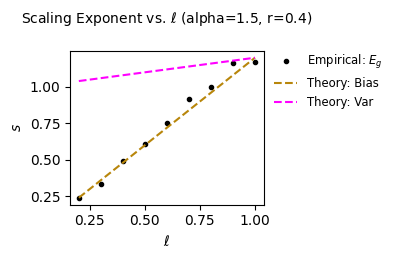

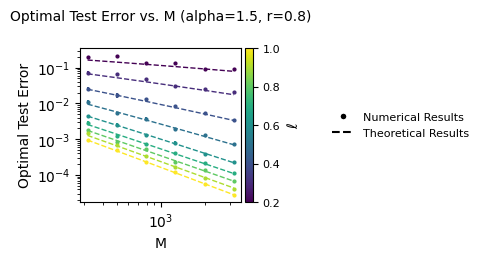

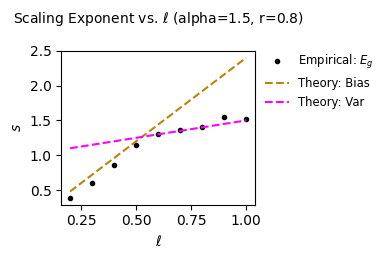

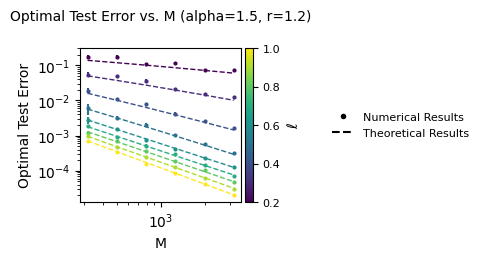

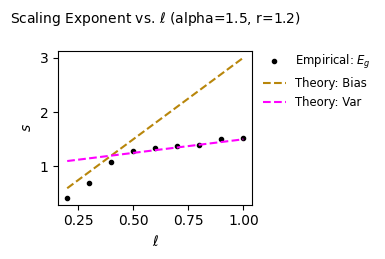

In [165]:
r_list = [.4, .8, 1.2]
for r in r_list:
    # Paths
    save_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features'
    fig_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/Figures'

    # Parameters (adjust these to match your experiment)
    alpha = 1.5
    num_trials = 5
    filename = f'RF_Gaussian_alpha{alpha}_r{r}_M_316-3162_P_15000_trials_{num_trials}.pkl'

    # Load experiment results
    with open(os.path.join(save_path, filename), 'rb') as f:
        experiment_results = pickle.load(f)

    # Unpack parameters
    num_trials = experiment_results['num_trials']
    ell_list = experiment_results['ell_list']
    M_list = experiment_results['M_list']
    lamVals = experiment_results['lamVals']
    P = experiment_results['P']
    nonlinearity = experiment_results['nonlinearity']
    test_errors = experiment_results['test_errors']          # Numerical results
    test_errors_theory = experiment_results['test_errors_theory']  # Theoretical results
    alpha = experiment_results['alpha']
    r = experiment_results['r']

    # Compute mean and standard deviation over trials (if numerical results are available)
    if 'test_errors' in experiment_results and test_errors is not None:
        mean_test_errors = np.mean(test_errors, axis=0)
        std_test_errors = np.std(test_errors, axis=0)
    else:
        mean_test_errors = None
        std_test_errors = None

    optimal_errors_numerical, std_errors_numerical, optimal_errors_theory = LearningCurveExperiments.compute_optimal_errors_ell(
        mean_test_errors,
        std_test_errors,
        test_errors_theory,
        M_list,
        ell_list
    )

    # optimal_errors_numerical = mean_test_errors[:, :, 0]
    # std_errors_numerical = std_test_errors[:, :, 0]
    # optimal_errors_theory = std_test_errors[:, :, 0]

    importlib.reload(LearningCurveExperiments)

    # Plot optimal test errors vs M
    title = f"Optimal Test Error vs. M (alpha={alpha}, r={r})"
    save_path_fig = os.path.join(fig_path, f'OptimalErrors_vs_M_alpha{alpha}_r{r}.svg')
    LearningCurveExperiments.plot_optimal_errors_vs_M(
        M_list,
        ell_list,
        optimal_errors_numerical,
        std_errors_numerical,
        optimal_errors_theory,
        num_trials,
        title=title,
        save_path=save_path_fig
    )

    # Fit power law to errors (using theoretical errors here)
    scaling_exponents = LearningCurveExperiments.fit_power_law_to_errors(
        M_list,
        optimal_errors_numerical,  # You can also use optimal_errors_numerical if available
        ell_list
    )

    # Plot scaling exponent vs ell
    title = f"Scaling Exponent vs. $\ell$ (alpha={alpha}, r={r})"
    save_path_fig = os.path.join(fig_path, f'ScalingExponent_vs_ell_alpha{alpha}_r{r}.svg')
    LearningCurveExperiments.plot_scaling_exponent_vs_ell_with_theory(
        ell_list,
        scaling_exponents,
        alpha,
        r,
        title=title,
        save_path=save_path_fig
    )
    
#     #To make sure we covered the proper range of lambda values:
    
#     fig, axs = plt.subplots(len(M_list), 1)
#     for MInd, M in enumerate(M_list):
#         for ellInd, ell in enumerate(ell_list):
#             axs[MInd].loglog(lamVals, test_errors_theory[MInd, ellInd], label = ell)
#             axs[MInd].set_title(M)
#             axs[MInd].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

## Plots for CIFAR10 Scaling with M

In [1]:
alpha_cifar = 1.42
r_cifar = (.08)/2/alpha_cifar

In [2]:
r_cifar

0.028169014084507043

In [13]:
# Paths
save_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features'
fig_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/Figures'

# Create a descriptive filename with a timestamp to avoid overwriting
M_min = 100
M_max = 1000
P = 50000
num_trials = 10
filename = f'RF_CIFAR_M_{M_min}-{M_max}_P_{P}_trials_{num_trials}.pkl'

# Load experiment results
with open(os.path.join(save_path, filename), 'rb') as f:
    experiment_results = pickle.load(f)
    
# Unpack parameters
num_trials = experiment_results['num_trials']
ell_list = experiment_results['ell_list']
M_list = experiment_results['M_list']
lamVals = experiment_results['lamVals']
P = experiment_results['P']
PTest = experiment_results['PTest']
nonlinearity = experiment_results['nonlinearity']
test_errors = experiment_results['test_errors']          # Numerical results
test_errors_theory = experiment_results['test_errors_theory']  # Theoretical results

In [14]:
# Compute mean and standard deviation over trials (if numerical results are available)
if 'test_errors' in experiment_results and test_errors is not None:
    mean_test_errors = np.mean(test_errors, axis=0)
    std_test_errors = np.std(test_errors, axis=0)
else:
    mean_test_errors = None
    std_test_errors = None

In [15]:
# Compute optimal errors
optimal_errors_numerical, std_errors_numerical, optimal_errors_theory = LearningCurveExperiments.compute_optimal_errors_ell(
    mean_test_errors,
    std_test_errors,
    test_errors_theory,
    M_list,
    ell_list
)

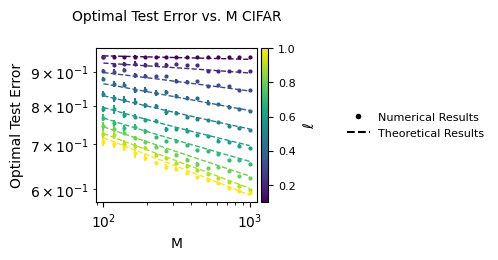

In [16]:
# Plot optimal test errors vs M
title = f"Optimal Test Error vs. M CIFAR"
save_path_fig = os.path.join(fig_path, f'OptimalErrors_vs_M_CIFAR.svg')
LearningCurveExperiments.plot_optimal_errors_vs_M(
    M_list,
    ell_list,
    optimal_errors_numerical,
    std_errors_numerical,
    optimal_errors_theory,
    num_trials,
    title=title,
    save_path=save_path_fig
)

In [17]:
# Fit power law to errors (using theoretical errors here)
scaling_exponents = LearningCurveExperiments.fit_power_law_to_errors(
    M_list,
    optimal_errors_numerical,  # You can also use optimal_errors_numerical if available
    ell_list
)

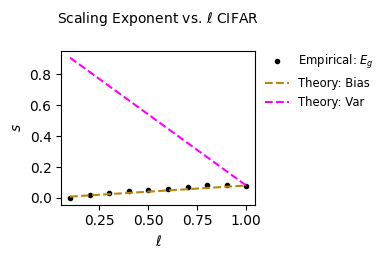

In [18]:
# Plot scaling exponent vs ell
title = f"Scaling Exponent vs. $\ell$ CIFAR"
save_path_fig = os.path.join(fig_path, f'ScalingExponent_vs_ell_CIFAR.svg')
LearningCurveExperiments.plot_scaling_exponent_vs_ell_with_theory(
    ell_list,
    scaling_exponents,
    alpha_cifar,
    r_cifar,
    title=title,
    save_path=save_path_fig
)

## Plots for MNIST Scaling with M

In [3]:
alpha_mnist = 1.53
r_mnist = (.31)/2/alpha_mnist

In [4]:
r_mnist

0.10130718954248366

In [21]:
# Paths
save_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features'
fig_path = '/n/holystore01/LABS/pehlevan_lab/Lab/bruben/Ensemble_Random_Features/Figures'

# Create a descriptive filename with a timestamp to avoid overwriting
M_min = 100
M_max = 1000
P = 50000
num_trials = 10
filename = f'RF_MNIST_M_{M_min}-{M_max}_P_{P}_trials_{num_trials}.pkl'

# Load experiment results
with open(os.path.join(save_path, filename), 'rb') as f:
    experiment_results = pickle.load(f)
    
# Unpack parameters
num_trials = experiment_results['num_trials']
ell_list = experiment_results['ell_list']
M_list = experiment_results['M_list']
lamVals = experiment_results['lamVals']
P = experiment_results['P']
PTest = experiment_results['PTest']
nonlinearity = experiment_results['nonlinearity']
test_errors = experiment_results['test_errors']          # Numerical results
test_errors_theory = experiment_results['test_errors_theory']  # Theoretical results

In [22]:
# Compute mean and standard deviation over trials (if numerical results are available)
if 'test_errors' in experiment_results and test_errors is not None:
    mean_test_errors = np.mean(test_errors, axis=0)
    std_test_errors = np.std(test_errors, axis=0)
else:
    mean_test_errors = None
    std_test_errors = None

In [23]:
# Compute optimal errors
optimal_errors_numerical, std_errors_numerical, optimal_errors_theory = LearningCurveExperiments.compute_optimal_errors_ell(
    mean_test_errors,
    std_test_errors,
    test_errors_theory,
    M_list,
    ell_list
)

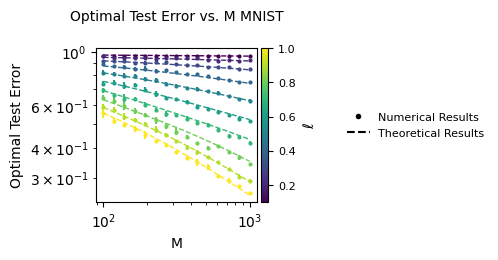

In [24]:
# Plot optimal test errors vs M
title = f"Optimal Test Error vs. M MNIST"
save_path_fig = os.path.join(fig_path, f'OptimalErrors_vs_M_MNIST.svg')
LearningCurveExperiments.plot_optimal_errors_vs_M(
    M_list,
    ell_list,
    optimal_errors_numerical,
    std_errors_numerical,
    optimal_errors_theory,
    num_trials,
    title=title,
    save_path=save_path_fig
)

In [25]:
# Fit power law to errors (using theoretical errors here)
scaling_exponents = LearningCurveExperiments.fit_power_law_to_errors(
    M_list,
    optimal_errors_numerical,  # You can also use optimal_errors_numerical if available
    ell_list
)

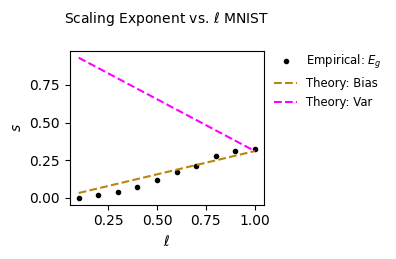

In [26]:
# Plot scaling exponent vs ell
title = f"Scaling Exponent vs. $\ell$ MNIST"
save_path_fig = os.path.join(fig_path, f'ScalingExponent_vs_ell_MNIST.svg')
LearningCurveExperiments.plot_scaling_exponent_vs_ell_with_theory(
    ell_list,
    scaling_exponents,
    alpha_mnist,
    r_mnist,
    title=title,
    save_path=save_path_fig
)